<a href="https://colab.research.google.com/github/Ciiku-Kihara/HOUSE-PRICES-ANALYSIS/blob/main/House_Pricing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the question

### a) Specifying the analysis question

Study the factors that affect housing prices using the given information on real estate properties

### b) Defining the metric for success

Be able to effectively use Linear, Lasso, Ridge, ElasticNet ad Quantile regression to build a model that would allow my client to accurately predict the sale prices upon being provided with the predictor variables

### c) Understanding the context

Buying a home is probably one of the most important investments that anyone can make in their life. Homeownership can lead to building your personal wealth due to home equity, or fair market value, which will likely increase over time based on both the real estate market and any renovations you make to your home.

In the United States about 67% of all occupied housing units being occupied by the unit's owner. Home ownership rates vary depending on demographic characteristics of households such as ethnicity, race, type of household as well as location and type of settlement.

Some factors that affect the price of a home are:

- Sale price of similar homes in the neighbourhood
- Size of the home and useable space
- Location
- Age & condition
- Economic indicators etc.

### d) Recording the experimental design

- Read and explore the given dataset
- Define the appropriateness of the available data to answer the given question
- Find and deal with outliers, anomalies, and missing data within the dataset
- Perform Exploratory Data Analysis
- Performing multicollinearity tests
- Performing regression analysis using the following:
    * Multiple Linear Regression
    * Quantile Regression
    * Ridge Regression
    * Lasso Regression
    * ElasticNet Regression 
- Provide a recommendation based on the analysis done.
- Create residual plots for the models
- Assess Heteroscedasticity using Bartlett’s test
- Challenge the solution.



### e) Data Relevance

The dataset contains adequate information to build a number of models using different regressions

## 2. Importing relevant libraries

In [114]:
# Loading necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.exceptions import ConvergenceWarning

## 3. Loading and checking the data

In [4]:
# Loading our dataset

house =  pd.read_csv('housing_data.csv')

In [5]:
# Getting a preview of the first 5 rows

house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# Determining the number of rows and columns in the dataset

house.shape

# This dataset has 21613 observations and 20 columns

(21613, 20)

In [7]:
# Determining the names of the columns present in the dataset

house.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
# Checking if each column is of the appropriate data type

house.dtypes

# Out of the 20 columns 5 are floats and 15 are integers

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 4. External data source validation

The dataset has been validated against the House Sales Kings County dataset on Kaggle. The link is provided below

https://www.kaggle.com/harlfoxem/housesalesprediction

## 5. Data cleaning


In [9]:
# Stripping the columns of any probable white spaces

house.columns = house.columns.str.strip()

# Preview of the dataset

house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
# Dropping unnecessary columns

house.drop('id', axis = 1, inplace=True)
house.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


In [11]:
# Checking for presence of null values

house.isnull().sum()

# There are no missing values is the dataset

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
# Checking if there are any duplicated rows

house.duplicated().sum()

# There are some duplicates in the data

5

In [13]:
# Dropping the duplicated observations

house.drop_duplicates(inplace=True)

# Confirming the duplicates have been dropped

house.duplicated().sum()

0

In [14]:
# Previewing the columns again

house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [15]:
# Checking for any anomalies in the categorical variables

qcol = ['floors', 'waterfront', 'view', 'condition', 'grade',
       'bedrooms', 'bathrooms']

for col in qcol:
  print(col, ':', house[col].unique())

# There may be an error in the number of bedrooms given as 33.
# It may have been a typo and the intention was to imput 3

floors : [1.  2.  1.5 3.  2.5 3.5]
waterfront : [0 1]
view : [0 3 4 2 1]
condition : [3 5 4 1 2]
grade : [ 7  6  8 11  9  5 10 12  4  3 13  1]
bedrooms : [ 3  2  4  5  1  6  7  0  8  9 11 10 33]
bathrooms : [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]


In [16]:
# Locating the entries that have 3 bedrooms and 33 bedrooms

print(house.loc[house['bedrooms']==33])
print(' ')
print(house.loc[house['bedrooms']==3].head(10))

# There is a house that has 3 bedrooms at 662500 dollars. 
# The 33 bedroom house has a sale price of 640000 dollars. This
# shows that that was an error

          price  bedrooms  bathrooms  ...     long  sqft_living15  sqft_lot15
15870  640000.0        33       1.75  ... -122.331           1330        4700

[1 rows x 19 columns]
 
       price  bedrooms  bathrooms  ...     long  sqft_living15  sqft_lot15
0   221900.0         3       1.00  ... -122.257           1340        5650
1   538000.0         3       2.25  ... -122.319           1690        7639
4   510000.0         3       2.00  ... -122.045           1800        7503
6   257500.0         3       2.25  ... -122.327           2238        6819
7   291850.0         3       1.50  ... -122.315           1650        9711
8   229500.0         3       1.00  ... -122.337           1780        8113
9   323000.0         3       2.50  ... -122.031           2390        7570
10  662500.0         3       2.50  ... -122.145           2210        8925
12  310000.0         3       1.00  ... -122.229           1780       12697
13  400000.0         3       1.75  ... -122.045           1370       

In [17]:
# Replacing the 33 bedrooms with 3 bedrooms

house['bedrooms'] = house['bedrooms'].replace(33,3)

# Confirming the changes

house['bedrooms'].unique()


array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10])

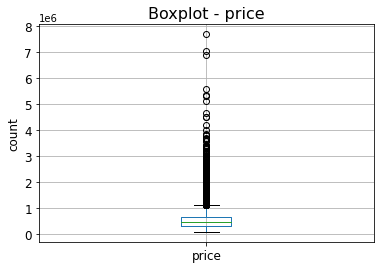

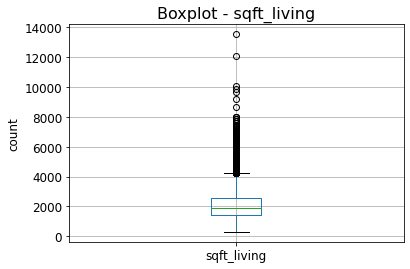

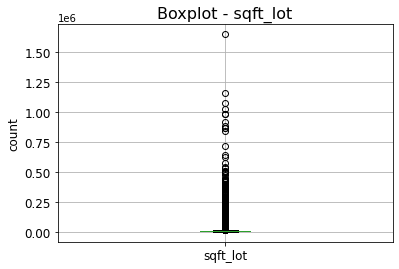

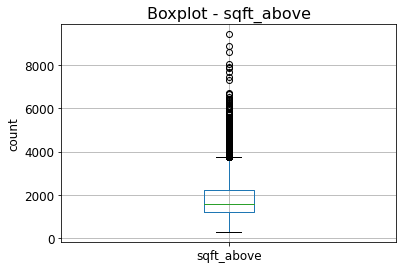

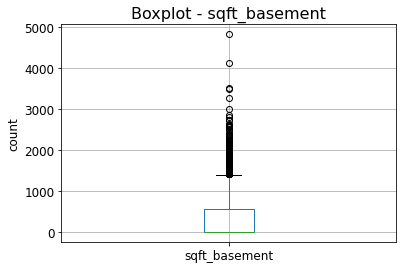

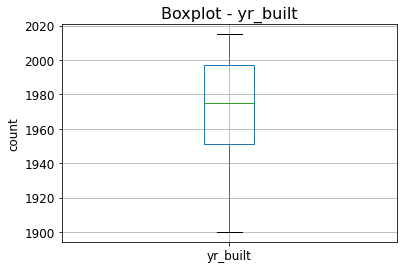

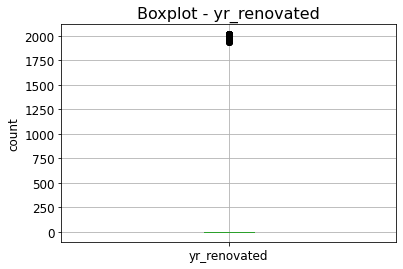

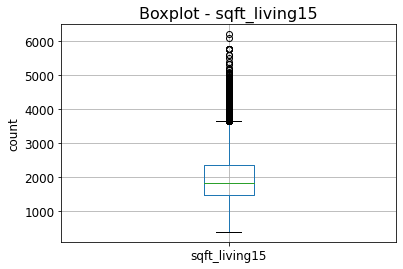

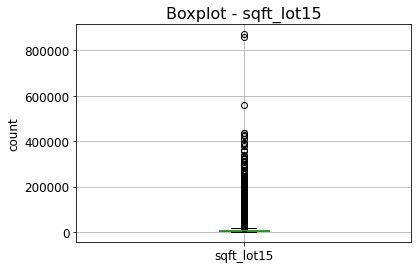

In [18]:
# Checking for Outliers

cols = ['price','sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15' ]

for column in cols:
    plt.figure()
    house.boxplot([column], fontsize= 12)
    plt.ylabel('count', fontsize = 12)
    plt.title('Boxplot - {}'.format(column), fontsize = 16)

# There are loads of outliers. That may be because many of the columns have 
# zeros hence pulling the mean and quartiles down.

In [19]:
# Determining how many rows would be lost if outliers were removed

# Calculating our first, third quantiles and then later our IQR
# ---
Q1 = house.quantile(0.25)
Q3 = house.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range
# ---
# 
house_new = house[~((house < (Q1 - 1.5 * IQR)) | (house > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(house_new.shape)

# Printing the shape of our old dataset
# ---
#
print(house.shape)

# Number of rows removed

rows_removed = house.shape[0] - house_new.shape[0]
print('Number of rows removed:', rows_removed)

# Percentage of rows removed of the percentage
row_percent = (rows_removed/house.shape[0]) * 100
print('Percentage of rows removed:', row_percent)

# There will be no need to remove the outliers since there aren't 
# any obvious errors in the data. Furthermore, removing outliers
# will reduce the diversity of the dataset 

(14929, 19)
(21608, 19)
Number of rows removed: 6679
Percentage of rows removed: 30.90984820436875


## 6. Exploratory Data Analysis

### a) Univariate Analysis

In [20]:
# Previewing the columns

house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

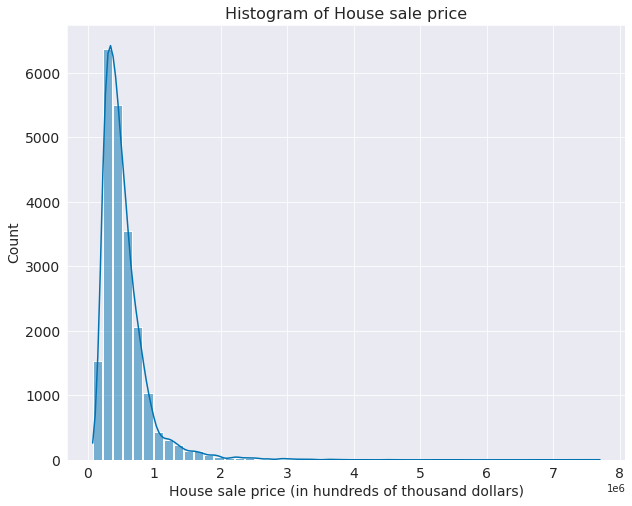

In [21]:
# Price univariate analysis
# Histogram on Price

def histogram(var1, bins):
  plt.figure(figsize= (10,8)),
  sns.set_style('darkgrid'),
  sns.set_palette('colorblind'),
  sns.histplot(x = var1, data=house,  bins = bins , shrink= 0.9, kde = True)

histogram('price', 50)
plt.title('Histogram of House sale price', fontsize = 16)
plt.xlabel('House sale price (in hundreds of thousand dollars)', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

# The distribution of price is leptokurtic and skewed to the right suggesting the presence of outliers

In [22]:
# Measures of central tendency

house['price'].describe()

# The mean price is $540,178.9. 
# The maximum price is $77,000,000
# The minimum price is $75,000
# 25% of house prices are below $321,612.5 while 50% of house prices are below
# $450,000 and 75% of house prices are below $645,000

count    2.160800e+04
mean     5.401924e+05
std      3.673996e+05
min      7.500000e+04
25%      3.218375e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

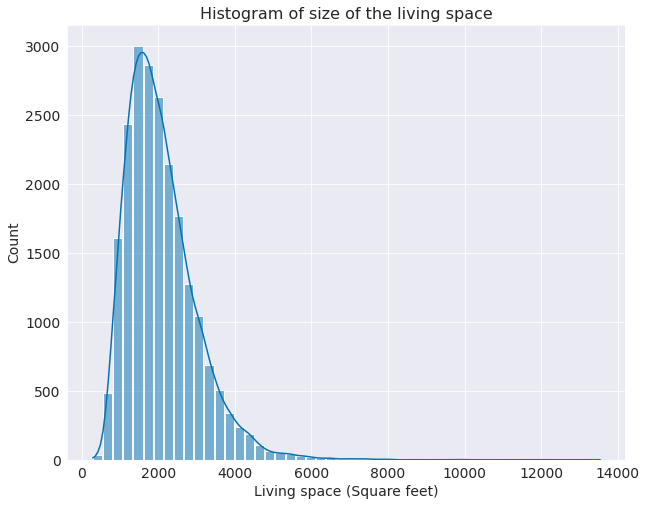

In [23]:
# Histogram of the size of the living space

histogram('sqft_living', 50)
plt.title('Histogram of size of the living space', fontsize = 16)
plt.xlabel('Living space (Square feet)', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()


In [24]:
# Defining a variable to calculate variation

def variation(var):
  print('The skewness is:', house[var].skew())
  print('The kurtosis is:', house[var].kurt())
  print('The coefficient of variation is:', house[var].std()/house[var].mean())

# Checking on coefficent of variance, skewness and kurtosis

variation('sqft_living')

# The distribution is slightly skewed to the right and is leptokurtic.
# There is low variance in the size of the living space in different houses

The skewness is: 1.4714674846314069
The kurtosis is: 5.242209340747705
The coefficient of variation is: 0.4415980443603558


In [25]:
# Measures of central tendency

house['sqft_living'].describe()

# The mean size of living space is 2079 
# The maximum size of living space is 13540
# The minimum size of living space is 290
# 25% of size of living space are below 1425 while 50% of size of living space are below
# 1910 and 75% of size of living space are below 2550.

count    21608.000000
mean      2079.958950
std        918.505805
min        290.000000
25%       1429.250000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

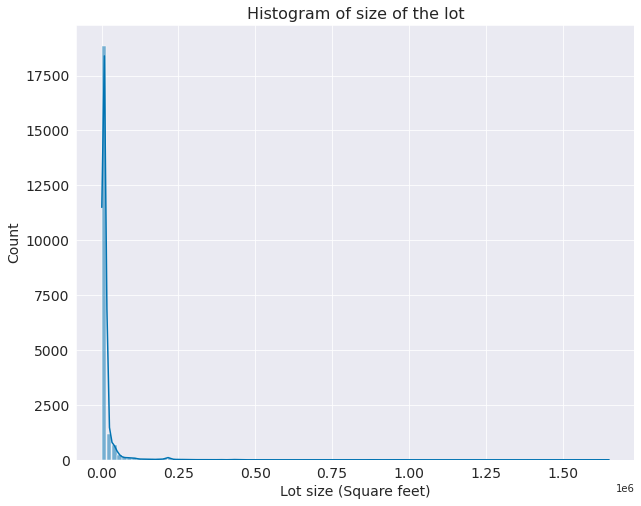

In [26]:
# Histogram of the size of the living space

histogram('sqft_lot', 100)
plt.title('Histogram of size of the lot', fontsize = 16)
plt.xlabel('Lot size (Square feet)', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [27]:
# Checking on coefficent of variance, skewness and kurtosis

variation('sqft_lot')

# The distribution is skewed to the right and is leptokurtic.
# There is high variance in the size of the lot in different houses

The skewness is: 13.058690623882546
The kurtosis is: 285.01867792617475
The coefficient of variation is: 2.741625828830122


In [28]:
# Measures of central tendency

house['sqft_lot'].describe()

# The mean size of lot is 15,108 
# The maximum size of lot is 1,651,359
# The minimum size of lot is 520
# 25% of size of lot are below 5040 while 50% of size of lot are below
# 7619 and 75% of size of lot are below 2550.

count    2.160800e+04
mean     1.510962e+04
std      4.142491e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.620000e+03
75%      1.069050e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

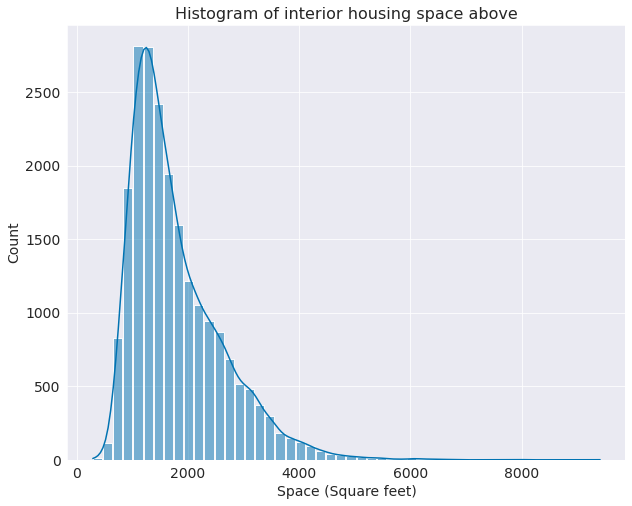

In [29]:
# Histogram of interior housing space that is above ground level

histogram('sqft_above', 50)
plt.title('Histogram of interior housing space above', fontsize = 16)
plt.xlabel('Space (Square feet)', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [30]:
# Checking measures of dispersion

variation('sqft_above')

# Distribution is slightly skewed to the right and is slightly leptokurtic
# The variation of space among houses is low

The skewness is: 1.4467403506883187
The kurtosis is: 3.4019276693258385
The coefficient of variation is: 0.4630587565267548


In [31]:
# Measures of central tendency

house['sqft_above'].describe()

# The mean size is 1788 
# The maximum size is 9410
# The minimum size is 290
# 25% of size of space are below 1190 while 50% of size of space are below
# 1560 and 75% of size of space are below 2210.

count    21608.000000
mean      1788.414846
std        828.141155
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

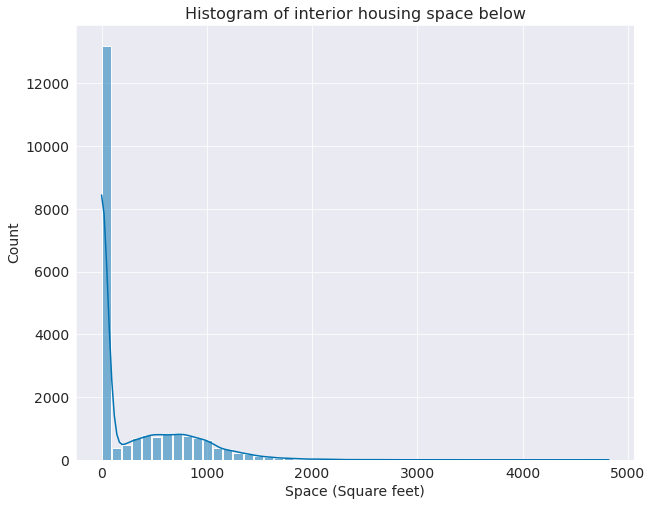

In [32]:
# Histogram of interior housing space that is below ground level

histogram('sqft_basement', 50)
plt.title('Histogram of interior housing space below', fontsize = 16)
plt.xlabel('Space (Square feet)', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [33]:
# Getting measures of dispersion

variation('sqft_basement')

# Distribution is skewed to the right and is leptokurtic.
# There is high variance.

The skewness is: 1.577730731994438
The kurtosis is: 2.714432815066743
The coefficient of variation is: 1.518166732492114


In [34]:
# Measures of central tendency

house['sqft_basement'].describe()

# The mean size is 291 
# The maximum size is 4820
# The minimum size is 0
# 75% of size of space are below 560.

count    21608.000000
mean       291.544104
std        442.612560
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

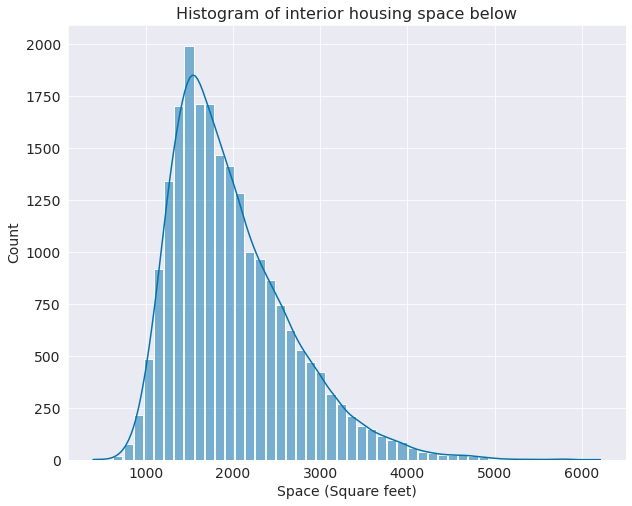

In [35]:
# Histogram of interior housing space for the nearest 15 neighbours

histogram('sqft_living15', 50)
plt.title('Histogram of interior housing space below', fontsize = 16)
plt.xlabel('Space (Square feet)', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [36]:
# Measures of dispersion

variation('sqft_living15')

# Distribution is slightly right skewed and slightly leptokurtic
# There is low variance

The skewness is: 1.1082576840301879
The kurtosis is: 1.5969742424841624
The coefficient of variation is: 0.34502531128524094


In [37]:
# Measures of central tendency

house['sqft_living15'].describe()

# The mean size is 1986 
# The maximum size is 6210
# The minimum size is 399
# 25% of size of space are below 1490 while 50% of size of space are below
# 1840 and 75% of size of space are below 2360.

count    21608.000000
mean      1986.583164
std        685.421474
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: sqft_living15, dtype: float64

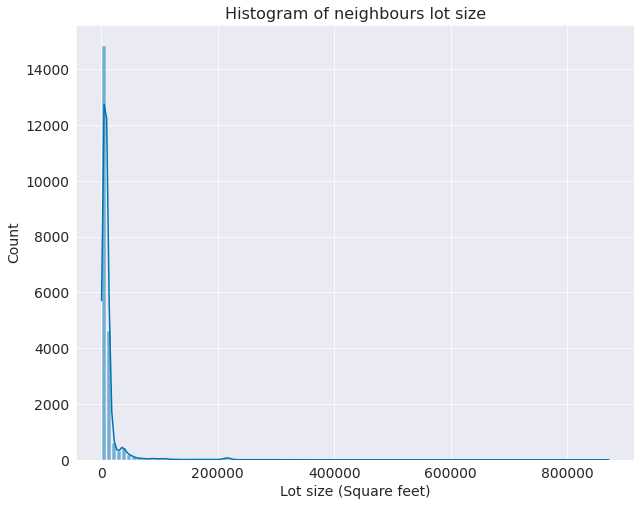

In [38]:
# Histogram of lot size for the nearest 15 neighbours

histogram('sqft_lot15', 100)
plt.title('Histogram of neighbours lot size', fontsize = 16)
plt.xlabel('Lot size (Square feet)', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [39]:
# Measures of dispersion

variation('sqft_lot15')

# Distribution is right skewed, leptokurtic and has high variance

The skewness is: 9.505817992358532
The kurtosis is: 150.732711029956
The coefficient of variation is: 2.138353580541876


In [40]:
# Measures of central tendency

house['sqft_lot15'].describe()

# The mean size is 12769 
# The maximum size is 871200
# The minimum size is 651
# 25% of sizes are below 5100 while 50% of sizes are below
# 7620 and 75% of sizes are below 10083.

count     21608.000000
mean      12770.108340
std       27307.006892
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.250000
max      871200.000000
Name: sqft_lot15, dtype: float64

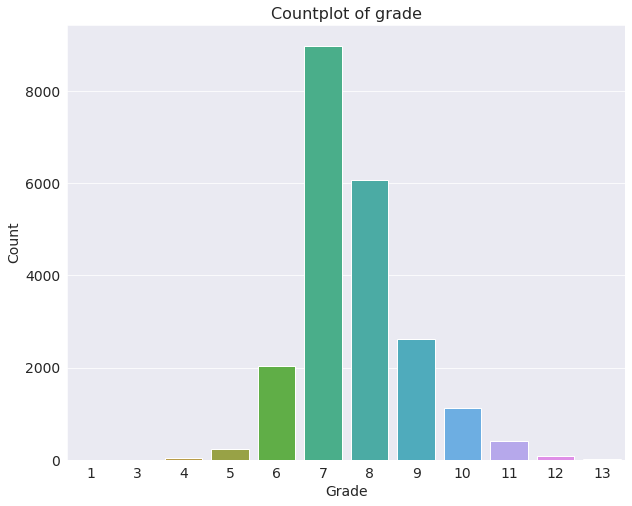

In [41]:
# Univariate analysis of grade

plt.figure(figsize = (10,8))
sns.countplot(x = house['grade'])
plt.title('Countplot of grade', fontsize = 16)
plt.xlabel('Grade', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

# More than 8000 of the homes are of grade 7. This means that
# they have an average level of construction and design

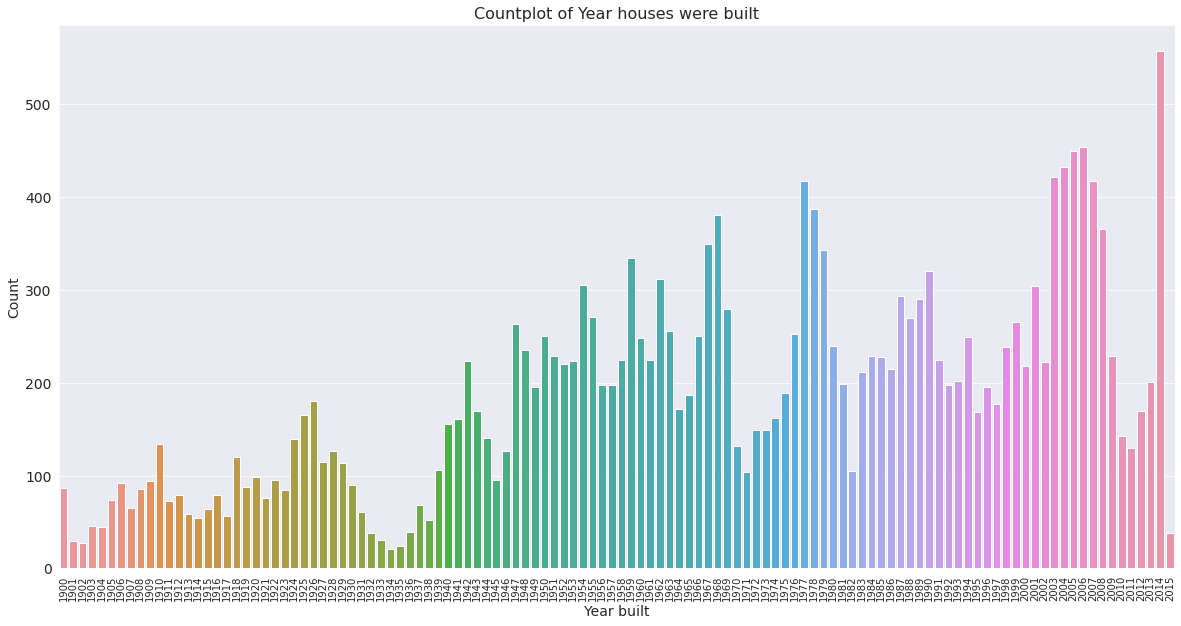

In [42]:
# Analysis of the year the homes were built

plt.figure(figsize = (20,10))
sns.countplot(x = house['yr_built'])
plt.title('Countplot of Year houses were built', fontsize = 16)
plt.xlabel('Year built', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 10, rotation = 90)
plt.yticks(fontsize = 14)
plt.show()

# Most of the houses were built in 2014 while the least number of houses
# were built in 1934. This dip in the number of houses built could be due to
# The Great Depression, which was the worst economic downturn in the history 
# of the industrialized world, lasting from 1929 to 1939.

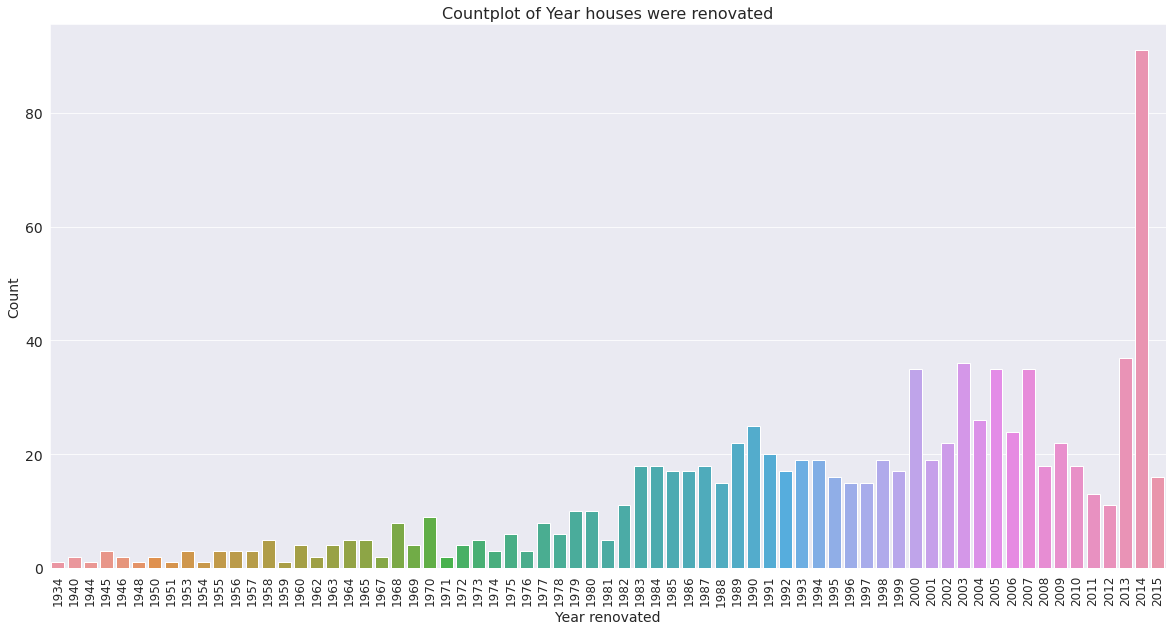

In [43]:
# Analysis of the year the homes were renovated

yr = house[house.yr_renovated > 0]
yr.head()

# Plotting the countplot

plt.figure(figsize = (20,10))
sns.countplot(x = yr['yr_renovated'])
plt.title('Countplot of Year houses were renovated', fontsize = 16)
plt.xlabel('Year renovated', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 14)
plt.show()

# Of all the houses that were renovated, most houses were renovated in 2014

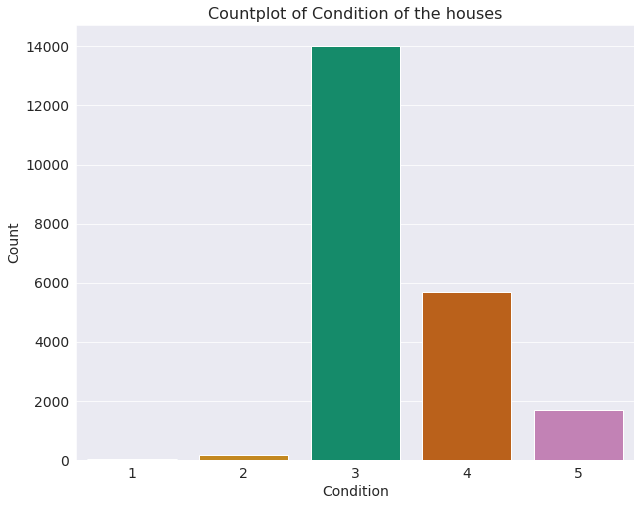

In [44]:
# Analysis of the condition of the houses

plt.figure(figsize = (10,8))
sns.countplot(x = house['condition'])
plt.title('Countplot of Condition of the houses', fontsize = 16)
plt.xlabel('Condition', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()


# Most of the houses are under condition level 3

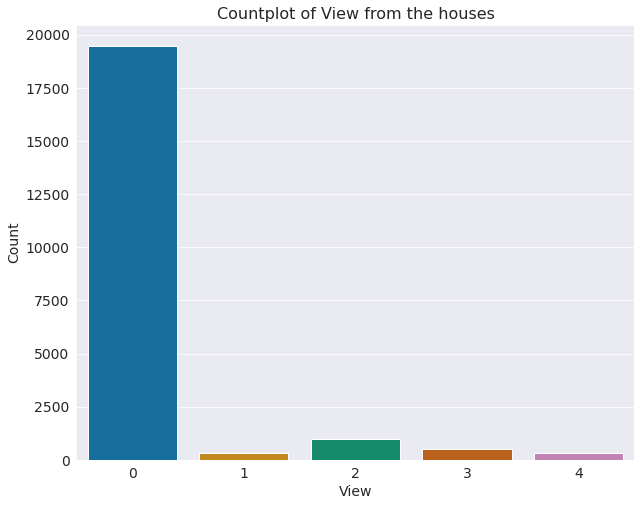

In [45]:
# Analysis of the view

plt.figure(figsize = (10,8))
sns.countplot(x = house['view'])
plt.title('Countplot of View from the houses', fontsize = 16)
plt.xlabel('View', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

# The index for the view from the houses ranges from 0 to 4 with 4 being the best view
# Most houses had terrible views

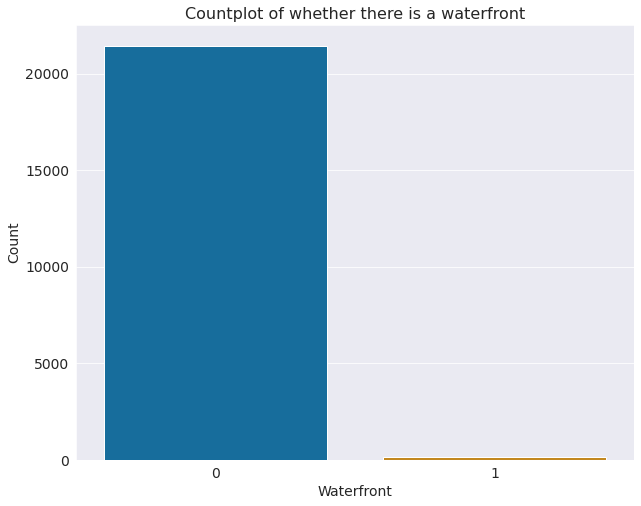

In [46]:
# Analysis of waterfront

plt.figure(figsize = (10,8))
sns.countplot(x = house['waterfront'])
plt.title('Countplot of whether there is a waterfront', fontsize = 16)
plt.xlabel('Waterfront', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

# Most of the houses do not have a waterfront

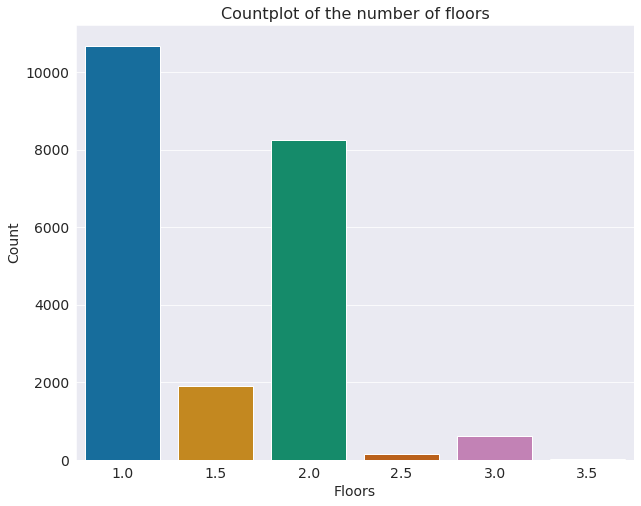

In [47]:
# Analysis of number of floors

plt.figure(figsize = (10,8))
sns.countplot(x = house['floors'])
plt.title('Countplot of the number of floors', fontsize = 16)
plt.xlabel('Floors', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

# More than 10000 houses have 1 floor with slightly 
# over 8000 houses having 2 floors

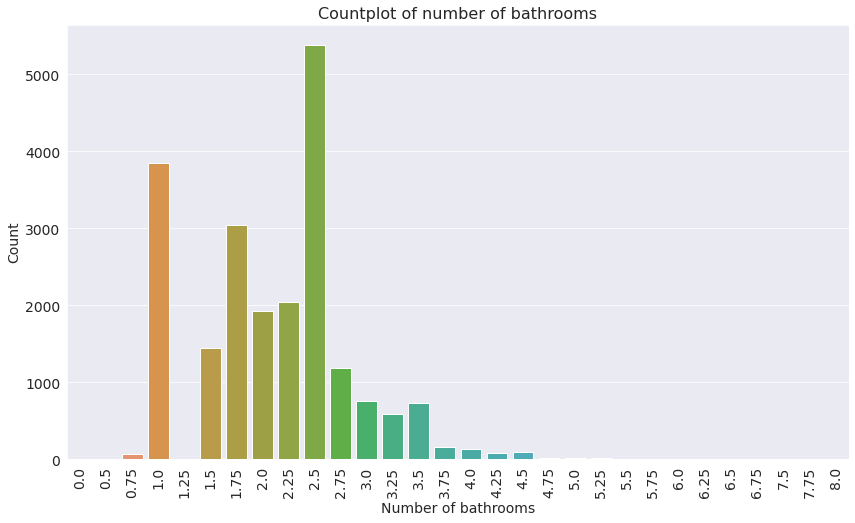

In [48]:
# Analysis of the number of bathrooms

plt.figure(figsize = (14,8))
sns.countplot(x = house['bathrooms'])
plt.title('Countplot of number of bathrooms', fontsize = 16)
plt.xlabel('Number of bathrooms', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14, rotation = 90)
plt.yticks(fontsize = 14)
plt.show()

# Most of the houses have 2.5 bathrooms.

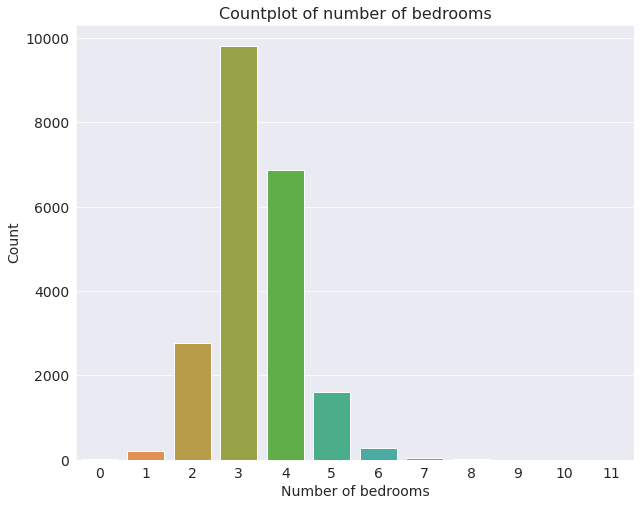

In [49]:
# Analysis of the number of bedrooms

plt.figure(figsize = (10,8))
sns.countplot(x = house['bedrooms'])
plt.title('Countplot of number of bedrooms', fontsize = 16)
plt.xlabel('Number of bedrooms', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

# Most of the houses have 3 bedrooms

### b) Bivariate Analysis

In [50]:
# Preview of dataset

house.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [51]:
# Preview of the coluns

house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

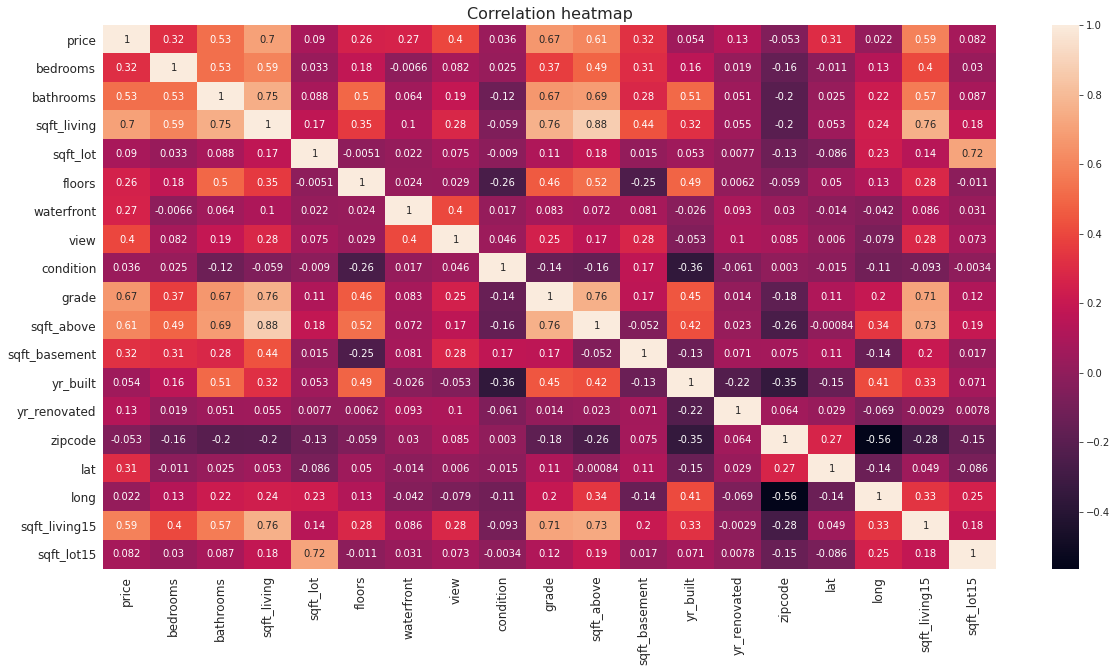

In [52]:
# Correlation heatmap

plt.figure(figsize=(20,10)) 
sns.heatmap(house.corr(),annot=True) 
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Correlation heatmap', fontsize = 16)
plt.show()

# There is a high positive correlation between price and size of living space
# There is a very weak correlation between price and lot size
# There is a moderately high positive correlation between the price and the interior housing space that is above ground level
# There is a weak positive correlation between the price and the interior housing space that is below ground level
# There is a moderate positive correlation between price and size of living space of the nearest 15 neighbours
# There is a very weak correlation between price and size of lot of the nearest 15 neighbours

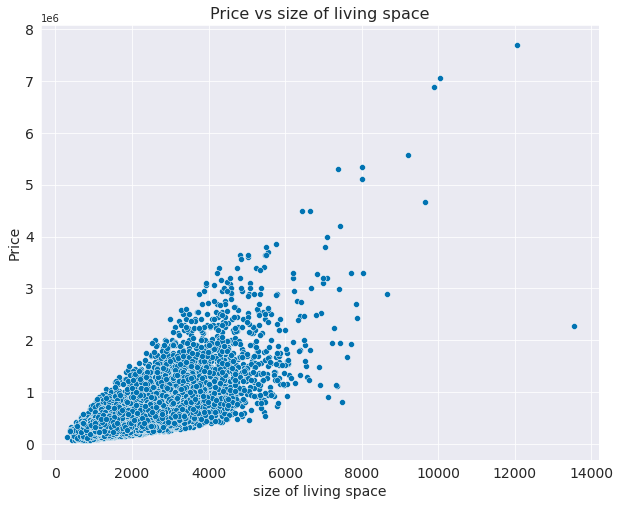

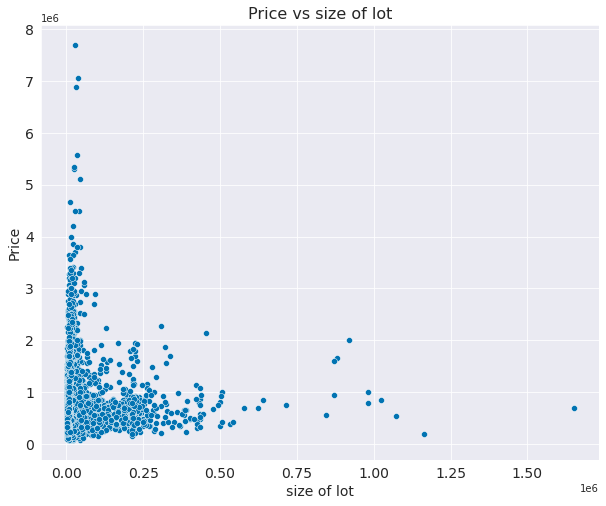

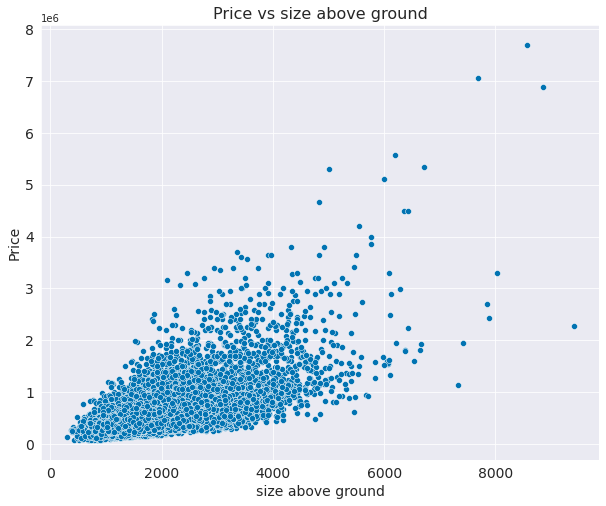

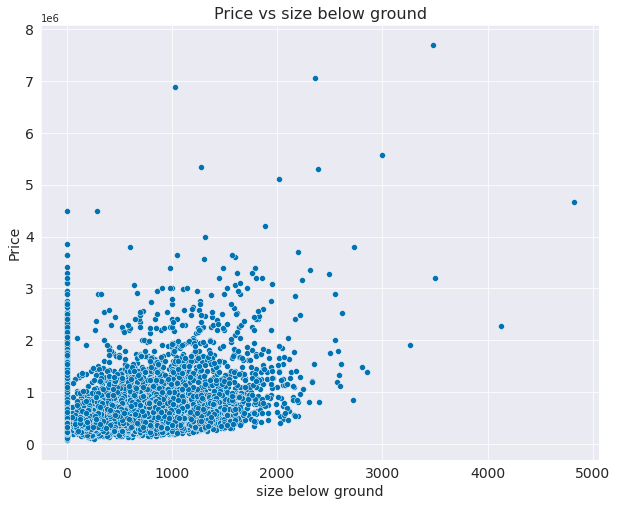

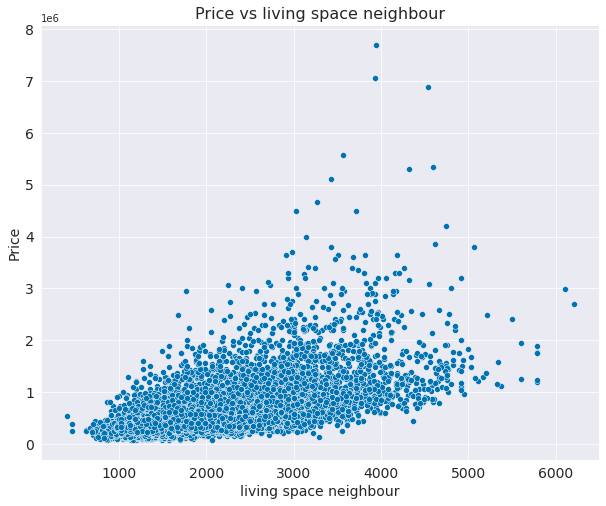

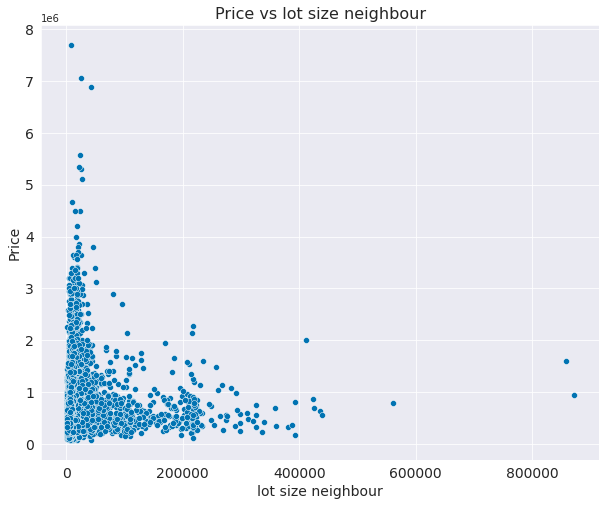

In [53]:
# Scatterplots comparing price and the quantitative variables

quant = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15' ]
name = ['size of living space', 'size of lot', 'size above ground', 'size below ground', 'living space neighbour', 'lot size neighbour']

for i,j in zip(quant, name):
  plt.figure(figsize= (10,8))
  sns.scatterplot(x= house[i], y = house['price'])
  plt.title('Price vs'+ ' '+ j , fontsize = 16)
  plt.ylabel('Price', fontsize=14)
  plt.xlabel(j, fontsize=14)
  plt.xticks(fontsize = 14)
  plt.yticks(fontsize = 14)
  plt.show()

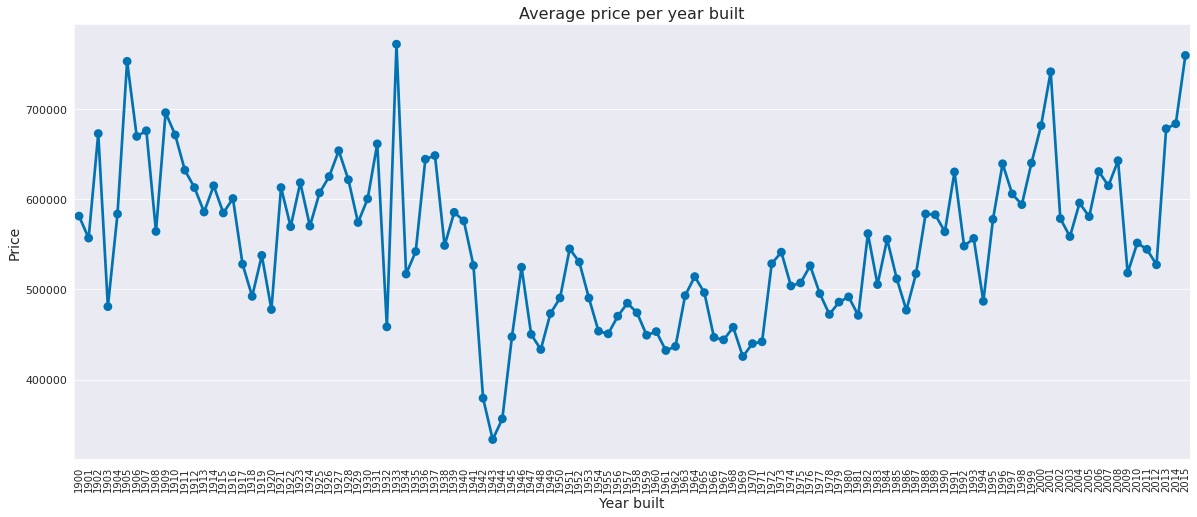

In [54]:
# Analysis of price vs year built

# Line graph of average price per year built

built = house.groupby('yr_built')['price'].mean()

built = pd.DataFrame(built)
built.reset_index(inplace= True)

plt.figure(figsize = (20,8))
sns.pointplot(x= built['yr_built'], y = built['price'])
plt.title('Average price per year built', fontsize = 16)
plt.xticks(fontsize = 10, rotation = 90)
plt.yticks(fontsize = 11)
plt.xlabel('Year built', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.show()


# On average, houses built in 1933 are most expensive.

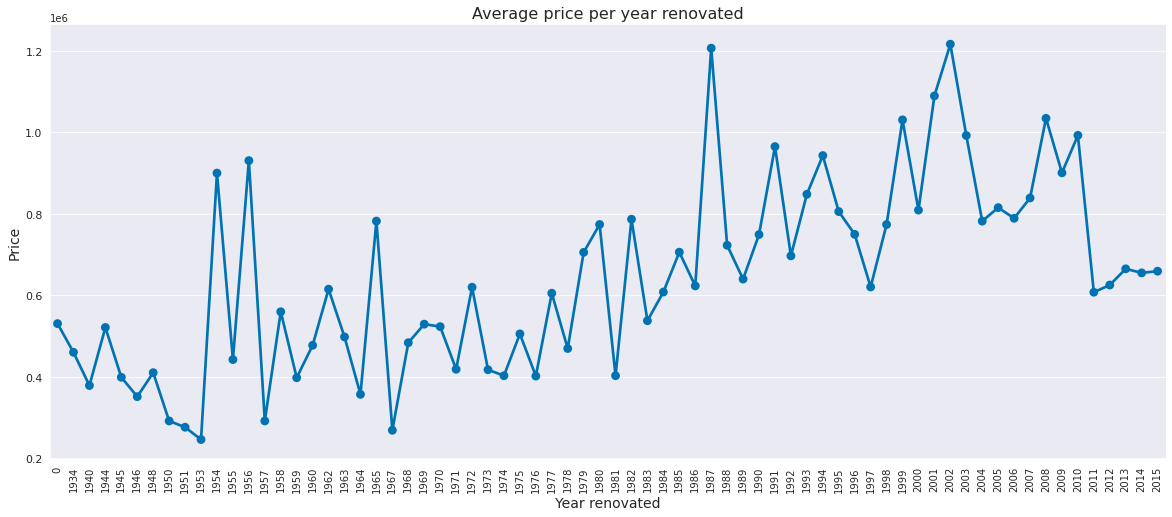

In [55]:
# Analysis of price vs year it was renovated

# Line graph of average price per year renovated

renovate = house.groupby('yr_renovated')['price'].mean()

renovate = pd.DataFrame(renovate)
renovate.reset_index(inplace= True)

plt.figure(figsize = (20,8))
sns.pointplot(x= renovate['yr_renovated'], y = renovate['price'])
plt.title('Average price per year renovated', fontsize = 16)
plt.xticks(fontsize = 10, rotation = 90)
plt.yticks(fontsize = 11)
plt.xlabel('Year renovated', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.show()


# In terms of renovation, houses renovated in 2002 are the most expensive followed by those renovated in 1987.

In [56]:
house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

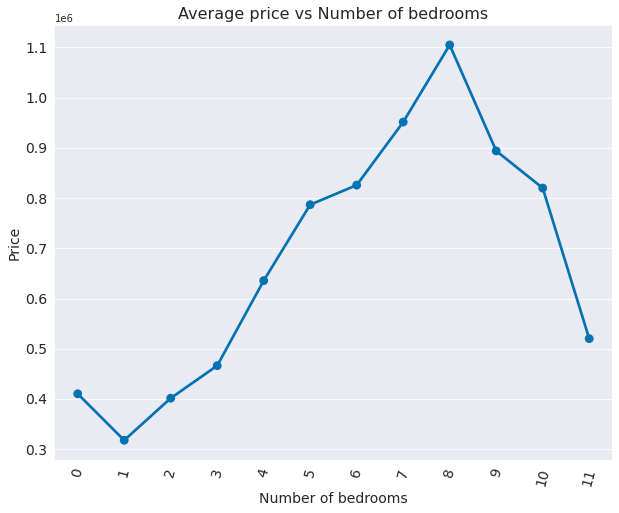

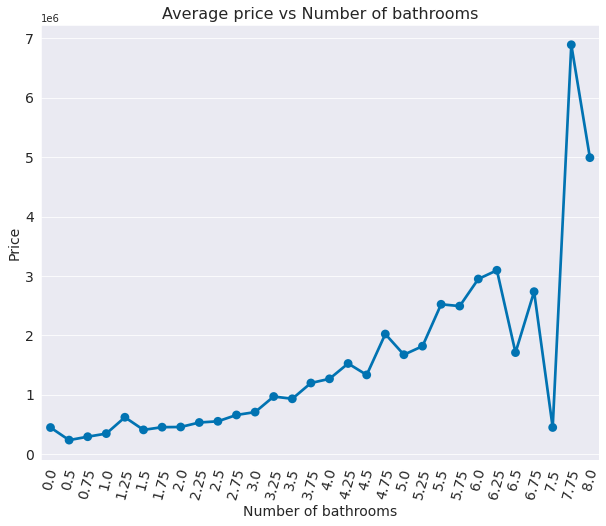

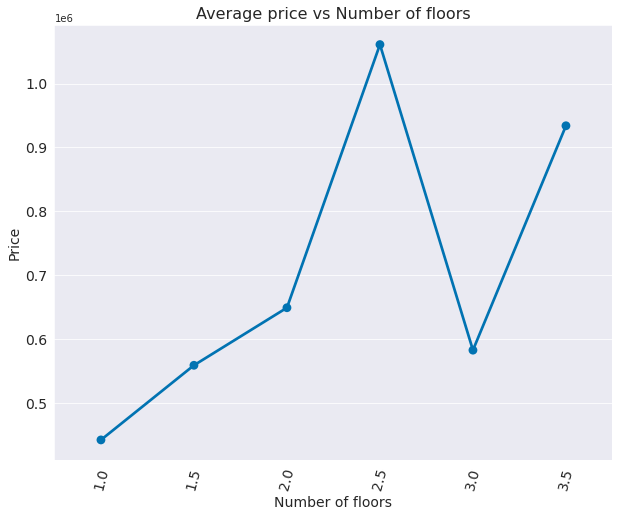

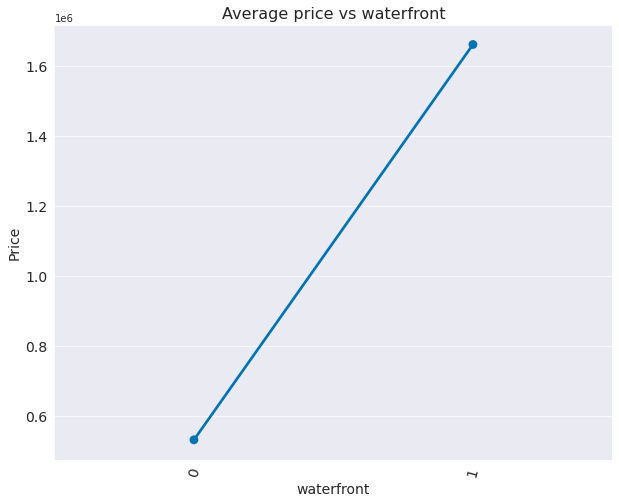

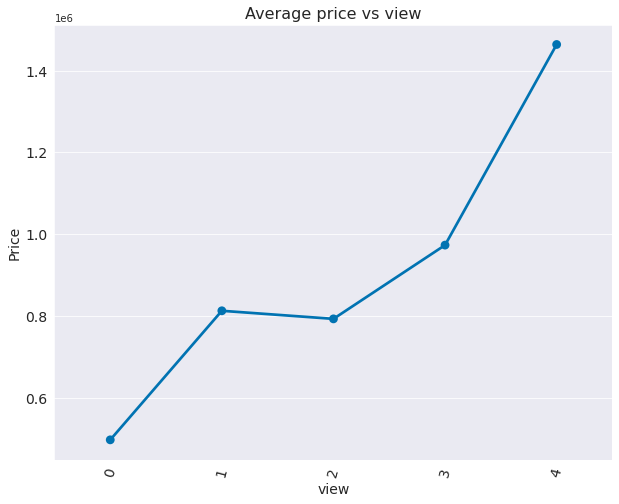

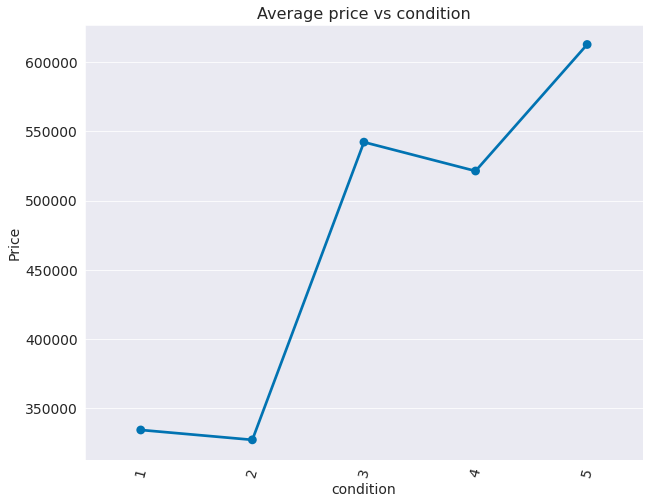

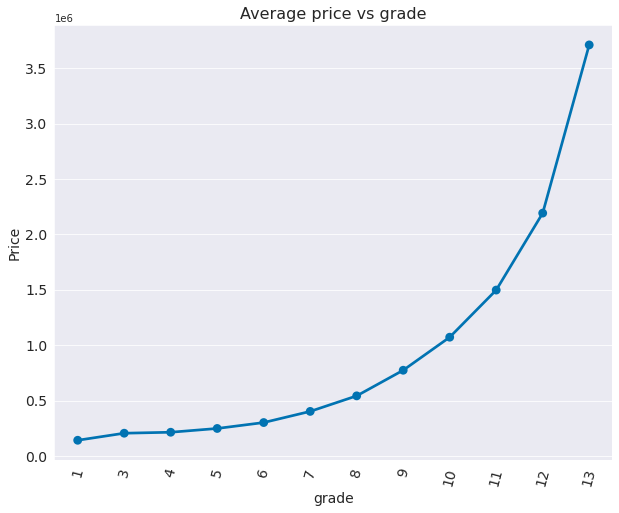

In [57]:
# Line graphs comparing price and categorical columns

cat = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']
name = ['Number of bedrooms', 'Number of bathrooms', 'Number of floors', 'waterfront', 'view', 'condition', 'grade']

for i,j in zip(cat, name):
  group = house.groupby(i)['price'].mean()

  group = pd.DataFrame(group)
  group.reset_index(inplace= True)

  plt.figure(figsize = (10,8))
  sns.pointplot(x= group[i], y = group['price'])
  plt.title('Average price vs' +' '+ j , fontsize = 16)
  plt.xticks(fontsize = 14, rotation = 75)
  plt.yticks(fontsize = 14)
  plt.xlabel(j, fontsize = 14)
  plt.ylabel('Price', fontsize = 14)
  plt.show()

### c) Multivariate Analysis 

In [58]:
# Getting a preview of the columns again

house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

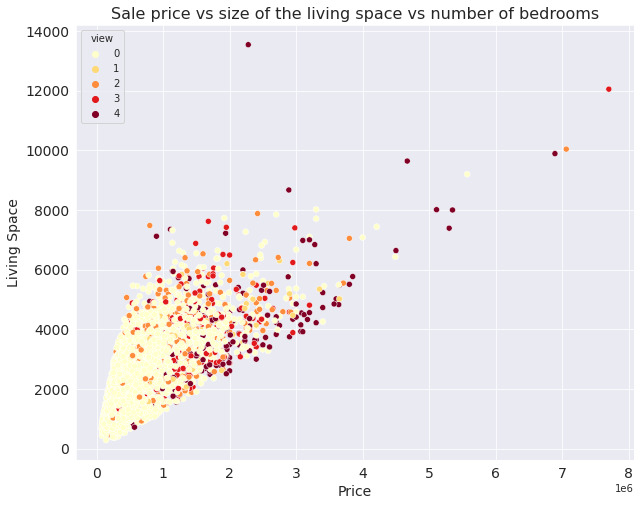

In [59]:
# Analysis of sale price, size of living space and number of bedrooms

plt.figure(figsize=(10,8))
sns.scatterplot(x= house['price'], y=house['sqft_living'], hue= house['view'], palette = "YlOrRd")
plt.title('Sale price vs size of the living space vs number of bedrooms', fontsize = 16)
plt.xlabel('Price', fontsize = 14)
plt.ylabel('Living Space', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

# Most of the houses with a great view have a larger living space
# and are more expensive as compared to those houses with a poor view.


## 7. Testing for multicollinearity
> Multicollinearity is the occurrence of high intercorrelations among 2 or more independent variables in a multiple regression model.

> Testing for multicollinearity is extremely important because it can lead to:

* Inaccurate estimates of the regression coefficients
* Inflation of the standard errors of the regression coefficients
* False and non-significant p-values
* Degredation of the predictability of the model

>Before testing for multicollinearity using the Variance Inflation Factor, I will encode the categorical columns and change the data type to categorical

In [60]:
# Changing categorical columns to categories

cat_col = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

for i in cat_col:
  house[i] = house[i].astype('category')
  house[i] = house[i].cat.codes

# Confirming the changes

print(house['bedrooms'].unique())
print(' ')
print(house.dtypes)

[ 3  2  4  5  1  6  7  0  8  9 11 10]
 
price            float64
bedrooms            int8
bathrooms           int8
sqft_living        int64
sqft_lot           int64
floors              int8
waterfront          int8
view                int8
condition           int8
grade               int8
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [108]:
# Defining X and y

X = house[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

y = house['price']

In [62]:
# Checking for multicollinearity

correlations = X.corr()
correlations

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.528906,0.591442,0.032778,0.181282,-0.006618,0.081812,0.025323,0.366619,0.490575,0.309474,0.159418,0.019454,-0.157116,-0.010598,0.133816,0.402567,0.030360
bathrooms,0.528906,1.000000,0.754559,0.087637,0.501250,0.063824,0.187763,-0.125185,0.665354,0.685337,0.283569,0.506644,0.050788,-0.204175,0.024513,0.223517,0.569078,0.087081
sqft_living,0.591442,0.754559,1.000000,0.172809,0.354181,0.103817,0.284627,-0.058825,0.762973,0.876593,0.435061,0.318253,0.055299,-0.199396,0.052514,0.240150,0.756398,0.183258
sqft_lot,0.032778,0.087637,0.172809,1.000000,-0.005113,0.021598,0.074744,-0.008988,0.113717,0.183508,0.015263,0.053154,0.007671,-0.129595,-0.085683,0.229530,0.144596,0.718552
floors,0.181282,0.501250,0.354181,-0.005113,1.000000,0.023731,0.029383,-0.263728,0.458132,0.524117,-0.245646,0.489244,0.006193,-0.059153,0.049595,0.125592,0.280080,-0.011180
waterfront,-0.006618,0.063824,0.103817,0.021598,0.023731,1.000000,0.401992,0.016648,0.082813,0.072076,0.080584,-0.026150,0.092949,0.030283,-0.014272,-0.041916,0.086466,0.030698
view,0.081812,0.187763,0.284627,0.074744,0.029383,0.401992,1.000000,0.045819,0.251466,0.167642,0.276993,-0.053196,0.103203,0.084857,0.006047,-0.078598,0.280391,0.072566
condition,0.025323,-0.125185,-0.058825,-0.008988,-0.263728,0.016648,0.045819,1.000000,-0.144775,-0.158273,0.174061,-0.361306,-0.060875,0.002998,-0.014975,-0.106590,-0.092920,-0.003449
grade,0.366619,0.665354,0.762973,0.113717,0.458132,0.082813,0.251466,-0.144775,1.000000,0.756174,0.168492,0.446969,0.014390,-0.184953,0.114115,0.198628,0.713522,0.119358
sqft_above,0.490575,0.685337,0.876593,0.183508,0.524117,0.072076,0.167642,-0.158273,0.756174,1.000000,-0.051932,0.424084,0.023217,-0.261132,-0.000837,0.343739,0.731846,0.194035


In [63]:
# Creating the VIF dataframe

VIF = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns = correlations.columns)
VIF

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.707943,-0.488111,-1.276343e-01,0.052546,0.051600,0.067038,0.120220,-0.046949,0.326479,-8.138038e-01,-4.517251e-01,0.144594,0.048689,0.084916,0.056478,0.017591,0.024384,0.090173
bathrooms,-0.488111,3.364895,-3.146411e+00,-0.025301,-0.678985,0.007984,-0.044117,-0.138260,-0.277267,1.588648e+00,4.466424e-01,-0.941347,-0.262012,0.040079,-0.042764,0.052687,0.088873,0.070011
sqft_living,-0.125158,-3.148200,-1.603965e+13,-0.151371,0.730135,-0.386073,0.429282,-0.505580,-0.767196,1.446163e+13,7.729239e+12,0.881305,-0.045450,-0.247109,-0.025001,0.096921,-1.167915,-0.057014
sqft_lot,0.052546,-0.025301,-1.528407e-01,2.102650,0.045328,0.027551,-0.058832,0.030581,-0.052911,-6.397424e-02,2.973197e-02,0.099178,0.021426,-0.002363,0.053551,-0.133186,0.163918,-1.459061
floors,0.051600,-0.678985,7.293192e-01,0.045328,2.012900,-0.005294,-0.040056,0.090070,-0.229157,-1.164176e+00,2.632917e-01,-0.479642,-0.079613,-0.170718,-0.127412,0.164157,0.273041,0.072672
waterfront,0.067038,0.007984,-3.860195e-01,0.027551,-0.005294,1.204182,-0.492499,-0.012697,0.050423,2.333398e-01,1.809041e-01,-0.020404,-0.065645,0.022825,0.010092,0.027234,0.054323,-0.018214
view,0.120220,-0.044117,4.289752e-01,-0.058832,-0.040056,-0.492499,1.435871,-0.020991,-0.183928,-3.522353e-01,-4.657689e-01,0.152355,-0.038914,-0.140211,0.119124,0.071993,-0.325248,-0.007028
condition,-0.046949,-0.138260,-5.062603e-01,0.030581,0.090070,-0.012697,-0.020991,1.249197,-0.053394,5.101635e-01,1.456927e-01,0.561598,0.206987,0.161396,0.063663,-0.006717,0.076011,-0.028116
grade,0.326479,-0.277267,-7.703665e-01,-0.052911,-0.229157,0.050423,-0.183928,-0.053394,3.425983,-9.316150e-01,-1.231054e-01,-0.635416,-0.070479,0.084621,-0.329989,0.393326,-0.912928,0.073239
sqft_above,-0.814732,1.590466,1.446163e+13,-0.065323,-1.164804,0.233382,-0.352488,0.509592,-0.934528,-1.303887e+13,-6.968820e+12,-0.283087,0.037407,0.143457,0.199966,-0.428357,-0.479721,-0.128172


In [64]:
# Extracting the VIF values

pd.Series(np.diag(VIF), index=[VIF.columns])

# There are some very high negative correlations

bedrooms         1.707943e+00
bathrooms        3.364895e+00
sqft_living     -1.603965e+13
sqft_lot         2.102650e+00
floors           2.012900e+00
waterfront       1.204182e+00
view             1.435871e+00
condition        1.249197e+00
grade            3.425983e+00
sqft_above      -1.303887e+13
sqft_basement   -3.724591e+12
yr_built         2.432000e+00
yr_renovated     1.150661e+00
zipcode          1.662424e+00
lat              1.181002e+00
long             1.825417e+00
sqft_living15    2.979674e+00
sqft_lot15       2.135998e+00
dtype: float64

## 8. Implementing the solution

### a) Multiple Linear Regression

> This is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. It is one of the simplest Machine Learning algorithms to use. 

> It is used when we want to predict the value of a variable based on the value of two or more other variables and when there is a linear relationship between the explanatory variables and the target variable.

In [65]:
# Splitting into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 55)

# Fitting the model

regress = LinearRegression(normalize=True)
regress.fit(X_train, y_train)

# Predicting the model

y_pred = regress.predict(X_test)

# Getting R2

print('OLS R2:', regress.score(X_test, y_test))
print('MSE OLS:', mean_squared_error(y_test, y_pred))

OLS R2: 0.6985833525690943
MSE OLS: 39765832735.245834


### Checking for heteroskedasticity using residual plots

In [66]:
# Obtaining the residuals for each observation

residuals = np.subtract(y_pred, y_test)

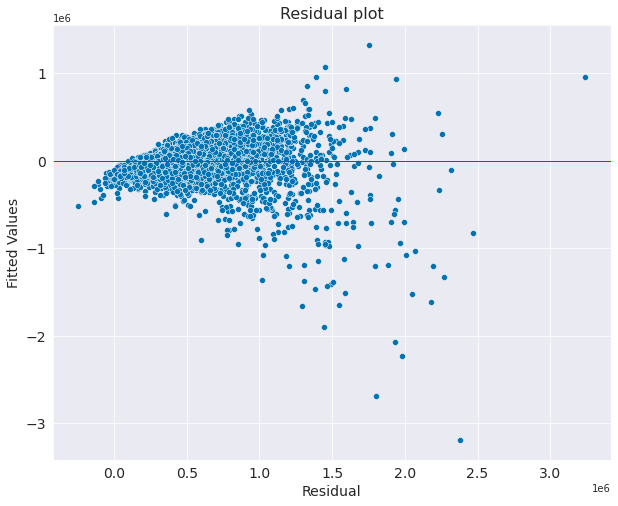

In [67]:
# Plotting the residual plot

plt.figure(figsize = (10,8))
sns.scatterplot(x = y_pred, y = residuals)
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.title('Residual plot', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Residual', fontsize = 14)
plt.ylabel('Fitted Values', fontsize = 14)
plt.show()

# The shape of the residuals is taking a funnel shape which would indicate the presence of heteroskedasticity.
# Just to confirm this, I will conduct Bartlett's test

### Checking for heteroskedasticity using Bartlett's test

> Ho: Variances are homogenous

> Ha: Variances are heterogenous

In [68]:
# Performing the test

import scipy as sc

stat, p_value = sc.stats.bartlett(y_pred, residuals)

# Obtaining the critical value

dof = len(y_pred) - 1
prob = 1 - p_value

critical_value = sc.stats.chi2.ppf(prob, dof)

print('Statistic:', stat)
print('Critical value', critical_value)

if stat > critical_value:
  print('Reject null hypothesis')
else:
  print('Do not reject null hypothesis')

# According to bartlett's test, there is no heteroskedasticity

Statistic: 1153.852145042929
Critical value inf
Do not reject null hypothesis


###b) Ridge Regression

This is a technique that is specialized to analyze multiple regression data that has multicollinearity.

By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors. It increases the level of bias and reduces the level of variance to prevent overfitting.

In [69]:
# Hyperparameter tuning

ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='r2',n_jobs=1,refit=True,cv=10)

In [70]:
# Getting the best parameter and best scores

search.fit(X_train,y_train)
print(search.best_params_)
print(' ')
print(search.best_score_)

# The ridge model using cross validation produced slightly worse results than the initial model.
# For clarity, I will set our hyperparameter to the recommended values and run on the data

{'alpha': 0.01}
 
0.6980365041952417


In [71]:
# Checking if there is any change
# Specifying the model with alpha = 0.01
ridge = Ridge(normalize = True, alpha=0.01)

# Fitting the model
ridge.fit(X_train,y_train)

# Predicting values
y_pred = ridge.predict(X_test)

# Obtaining the mean square error and R2
mse_r = mean_squared_error(y_test, y_pred)
print('MSE Ridge:', mse_r)
print('Ridge R2:', ridge.score(X_test, y_test))


MSE Ridge: 39742636915.200226
Ridge R2: 0.698759172005823


In [72]:
# Comparing the coefficients

OLS =  pd.Series(regress.coef_)

ridge2 =  pd.Series(ridge.coef_)

ind = pd.Series(X.columns)

# Creating the comparison dataframe

df = pd.concat([ind, OLS, ridge2], axis=1)
df.rename({0:'Feature', 1: 'OLS_coef', 2: 'Ridge_coef'}, axis = 1, inplace=True)
df

# There is not much of a difference in the linear regression coefficients
# and the ridge regression coefficients

,Feature,OLS_coef,Ridge_coef
0,bedrooms,-38421.055443,-36993.459799
1,bathrooms,10865.970179,10792.538658
2,sqft_living,93.668447,92.506978
3,sqft_lot,0.162879,0.161113
4,floors,4967.947307,5272.184046
5,waterfront,611960.437845,607687.264165
6,view,52670.853132,52714.031872
7,condition,26157.108288,26554.258895
8,grade,93484.837010,91795.870434
9,sqft_above,97.780031,96.368965


Using the Ridge regression, there was a very slight increase in accuracy as compared to using the OLS regression. The OlS model has an accuracy of 69.85 while Ridge model has an accuracy of 69.88.

**One major limitation of Ridge regression** is that it only shrinks the coefficients towards zero but does not perform feature selection. So ultimately, all the features, even the useless ones will be included in the model

### c) Lasso Regression

Lasso stands for Least Absolute Shrinkage Operator. It is uses in cases where there is high multicollinearity in feature variables.

Whereas ridge regression only shrinks regression coefficients towards zero, lasso regression does the same and also performs feature selection. Because of its ability to perform feature selection, it produces simpler and more interpretable models that incorporate only a reduced set of predictors.

In [73]:
# Hyper parameter tuning for lasso regression

parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

lasso = Lasso(normalize= True)

gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')

In [ ]:
# Getting the best parameter and best scores

gridlasso.fit(X_train,y_train)

In [75]:
# Obtaining the best parameter

print(gridlasso.best_params_)
print(' ')
print(gridlasso.best_score_)

# It seems that the accuracy in linear regression is better than in the lasso
# regression. For clarity, I will set the hyperparametrs to the recommended values and run on the data

{'alpha': 0.1}
 
0.6977278317908361


In [76]:
# Carrying out lasso regression

lasso = Lasso(normalize= True, alpha= 0.1)

# Fitting the regression

lasso.fit(X_train, y_train)

# Making a prediction

y_pred = lasso.predict(X_test)

# Obtaining the mean square error and R2
mse_r = mean_squared_error(y_test, y_pred)
print('MSE Lasso:', mse_r)
print('Lasso R2:', lasso.score(X_test, y_test))

MSE Lasso: 39766531909.28279
Lasso R2: 0.6985780529769647


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19226258564856.438, tolerance: 206123344046.34805
  positive)


In [77]:
# Comparing the coefficients

OLS =  pd.Series(regress.coef_)

lasso2 =  pd.Series(lasso.coef_)

ind = pd.Series(X.columns)

# Creating the comparison dataframe

df = pd.concat([ind, OLS, lasso2], axis=1)
df.rename({0:'Feature', 1: 'OLS_coef', 2: 'Lasso_coef'}, axis = 1, inplace=True)
df

# There are some differences between Lasso and Linear Regression coefficients
# For example in sqft_above and sqft_basement, the coefficients decreased drastically

,Feature,OLS_coef,Lasso_coef
0,bedrooms,-38421.055443,-38405.444308
1,bathrooms,10865.970179,10839.250919
2,sqft_living,93.668447,262.681899
3,sqft_lot,0.162879,0.161884
4,floors,4967.947307,4966.045290
5,waterfront,611960.437845,611852.909842
6,view,52670.853132,52671.852239
7,condition,26157.108288,26137.751615
8,grade,93484.837010,93513.270476
9,sqft_above,97.780031,-71.135052


Using the Lasso regression did not improve the accuracy of the model. For both the OLS regression and Lasso regressions, the accuracy was 69.85. Hence the Lasso regression is not going to be the best choice in this case.

**One major limitation of Lasso regression** is that Lasso struggles with correlated features in that it will select only one predictor to represent the whole group of correlated predictors. This selection will be done in a random way which is bad for reproducibility and interpretation. This is called the 'grouping effect'

### d) ElasticNet Regression

This regression combines the power of ridge and lasso regression into one algorithm.

This means that with elastic net algorithm, we can remove weak variables altogether as with lasso or to reduce them close to zero as with ridge.

ElasticNet regression can be used when there are correlations between parameters. It can also be used in a situation where you have a really big dataset but you need all the features and you don't want to drop some as with Lasso regression.

In [78]:
# Hyperparameter Tuning

elastic = ElasticNet(normalize=True)
search = GridSearchCV(estimator = elastic, param_grid={'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
                                                       'l1_ratio': np.arange(0, 1, 0.01)},
                      scoring = 'r2', n_jobs = 1, refit = True, cv = 10)

In [ ]:
# Fitting our model and display the best parameters and best results
# we can get with the setup we have

search.fit(X_train, y_train)

In [80]:
# Displaying the best parameters and best score

print(search.best_params_)
print(search.best_score_)

{'alpha': 1e-05, 'l1_ratio': 0.9400000000000001}
0.698038568520025


In [81]:
# Fitting the model with the recommended parameters

elastic = ElasticNet(normalize=True, alpha= 0.00005, l1_ratio=0.94)
elastic.fit(X_train, y_train)

# Making predictions
y_pred = elastic.predict(X_test)

# Obtaining the mean square error and R2
mse_r = mean_squared_error(y_test, y_pred)
print('MSE ElasticNet:', mse_r)
print('ElasticNet R2:', elastic.score(X_test, y_test))

MSE ElasticNet: 39766098683.418945
ElasticNet R2: 0.6985813367378841


In [82]:
# Comparing the coefficients

OLS =  pd.Series(regress.coef_)

elastic2 =  pd.Series(elastic.coef_)

ind = pd.Series(X.columns)

# Creating the comparison dataframe

df = pd.concat([ind, OLS, elastic2], axis=1)
df.rename({0:'Feature', 1: 'OLS_coef', 2: 'ElasticNet_coef'}, axis = 1, inplace=True)
df

# From the table below it is clear that no feature selection was done. However, 
# Some coefficients were scaled downwards.

,Feature,OLS_coef,ElasticNet_coef
0,bedrooms,-38421.055443,-32457.209088
1,bathrooms,10865.970179,10583.240335
2,sqft_living,93.668447,88.880230
3,sqft_lot,0.162879,0.154249
4,floors,4967.947307,6167.420962
5,waterfront,611960.437845,593043.139736
6,view,52670.853132,52836.209748
7,condition,26157.108288,27586.694429
8,grade,93484.837010,86655.768387
9,sqft_above,97.780031,91.962785


Using the ElasticNet regression did not improve the accuracy of the model. For both the OLS regression and ElasticNet regressions, the accuracy was 69.85. Hence the ElasticNet regression is not going to be the best choice in this case.

**One major limitation** **of using ElasticNet regression** is the computational cost. Since one needs to crossvalidate the relative weights of L1 and L2, it increases the computational cost of conducting a grid search.

### e) Quantile Regression

Quantile regression looks at the relationship between X and the conditional quantiles of y rather than just the conditional mean of y.
A quantile regression estimates the change in a specified quantile q of the dependent variable.

Quantile regression is a valuable tool for cases where the assumptions of Linear regression are not met and for cases where the interest is in the quantiles.

When quantile regression can be used:
- To estimate any quantile
- When the key assumptions of linear regression are not satisfied
- There are outliers in the data
- Residuals are not normal
- There is an increase in error variance with increase in outcome variable

In [86]:
house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [140]:
# Changing the categorical variables into integers

cat_col = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

for i in cat_col:
  X[i] = X[i].astype('int64')

X.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [153]:
# Fitting an OLS regression

import statsmodels.api as sm

model = sm.OLS.from_formula('price ~ sqft_living + sqft_lot + sqft_lot15 + sqft_basement + sqft_living15 + lat + long + bedrooms + bathrooms + floors + waterfront + view + condition + grade + yr_built + yr_renovated + zipcode', data = house)
OLS = model.fit()
print(OLS.summary())

# According to OLS, the floors coefficient is not significatly different from zero

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2967.
Date:                Fri, 16 Apr 2021   Prob (F-statistic):               0.00
Time:                        10:01:29   Log-Likelihood:            -2.9453e+05
No. Observations:               21608   AIC:                         5.891e+05
Df Residuals:                   21590   BIC:                         5.892e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.266e+06   2.93e+06      2.478

In [148]:
# Finding the regression coefficients for 25th percentile

model = smf.quantreg('price ~ sqft_living + sqft_lot + sqft_lot15 + sqft_basement + sqft_living15 + lat + long + bedrooms + bathrooms + floors + waterfront + view + condition + grade + yr_built + yr_renovated + zipcode', data = house)
resq1 = model.fit(q=0.25)
resq1.summary()

# All parameter coefficients are significantly different from zero


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                  price   Pseudo R-squared:               0.4246
Model:                       QuantReg   Bandwidth:                   1.703e+04
Method:                 Least Squares   Sparsity:                    2.931e+05
Date:                Fri, 16 Apr 2021   No. Observations:                21608
Time:                        09:52:49   Df Residuals:                    21590
                                        Df Model:                           17
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -145.2505      4.266    -34.051      0.000    -153.612    -136.889
sqft_living      79.3741      2.241     35.415      0.000      74.981      83.767
sqft_lot          0.1887      0.032      5.953      0.000       0.127       0.251
sqft_lot15       -0.2108      0.046     -4.574      0.000      -0.301      -0.120
sqft_basement    -6.6587      2.721     -2.447      0.014     -11.992      -1.326
sqft_living15    34.8795      2.037     17.120      0.000      30.886      38.873
lat            4.648e+05   7940.542     58.540      0.000    4.49e+05     4.8e+05
long           3.334e+04   8697.407      3.833      0.000    1.63e+04    5.04e+04
bedrooms      -1.485e+04   1224.741    -12.126      0.000   -1.73e+04   -1.25e+04
bathrooms      7224.0310    514.764     14.034      0.000    6215.056    8233.006
floors         1.141e+04   1114.712     10.239      0.000    9228.355    1.36e+04
waterfront     2.159e+05   1.06e+04     20.421      0.000    1.95e+05    2.37e+05
view           3.589e+04   1371.545     26.164      0.000    3.32e+04    3.86e+04
condition      2.435e+04   1484.009     16.407      0.000    2.14e+04    2.73e+04
grade          7.102e+04   1323.688     53.657      0.000    6.84e+04    7.36e+04
yr_built      -1630.9133     40.280    -40.489      0.000   -1709.866   -1551.961
yr_renovated      9.0241      2.278      3.961      0.000       4.559      13.490
zipcode        -154.0255     11.864    -12.983      0.000    -177.280    -130.771
=================================================================================

The condition number is large, 2.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [149]:
# Finding the regression coefficients for 50th percentile

model = smf.quantreg('price ~ sqft_living + sqft_lot + sqft_lot15 + sqft_basement + sqft_living15 + lat + long + bedrooms + bathrooms + floors + waterfront + view + condition + grade + yr_built + yr_renovated + zipcode', data = house)
resq2 = model.fit(q=0.5)
resq2.summary()

# At the 50th percentile the sqft_basement variable is not significant.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                  price   Pseudo R-squared:               0.4744
Model:                       QuantReg   Bandwidth:                   1.950e+04
Method:                 Least Squares   Sparsity:                    2.636e+05
Date:                Fri, 16 Apr 2021   No. Observations:                21608
Time:                        09:53:09   Df Residuals:                    21590
                                        Df Model:                           17
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -79.9076      4.124    -19.378      0.000     -87.990     -71.825
sqft_living     101.5727      2.409     42.172      0.000      96.852     106.294
sqft_lot          0.2122      0.031      6.767      0.000       0.151       0.274
sqft_lot15       -0.2460      0.048     -5.129      0.000      -0.340      -0.152
sqft_basement    -1.1536      2.828     -0.408      0.683      -6.697       4.390
sqft_living15    36.4936      2.221     16.430      0.000      32.140      40.847
lat             5.32e+05   7030.091     75.676      0.000    5.18e+05    5.46e+05
long           -3.59e+04   8553.936     -4.197      0.000   -5.27e+04   -1.91e+04
bedrooms      -2.184e+04   1288.096    -16.956      0.000   -2.44e+04   -1.93e+04
bathrooms      7523.1977    534.493     14.075      0.000    6475.552    8570.843
floors         1.771e+04   1159.981     15.266      0.000    1.54e+04       2e+04
waterfront     4.625e+05   1.14e+04     40.671      0.000     4.4e+05    4.85e+05
view           5.095e+04   1394.634     36.534      0.000    4.82e+04    5.37e+04
condition      2.548e+04   1521.943     16.742      0.000    2.25e+04    2.85e+04
grade          7.994e+04   1407.262     56.808      0.000    7.72e+04    8.27e+04
yr_built      -2087.8725     44.549    -46.867      0.000   -2175.191   -2000.554
yr_renovated     16.2904      2.389      6.818      0.000      11.607      20.974
zipcode        -263.8360     11.681    -22.586      0.000    -286.732    -240.940
=================================================================================

The condition number is large, 2.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [150]:
# Finding the regression coefficients for 75th percentile

model = smf.quantreg('price ~ sqft_living + sqft_lot + sqft_lot15 + sqft_basement + sqft_living15 + lat + long + bedrooms + bathrooms + floors + waterfront + view + condition + grade + yr_built + yr_renovated + zipcode', data = house)
resq3 = model.fit(q=0.75)
resq3.summary()

# At the 75th percentile the sqft_basement variable is not significant.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                  price   Pseudo R-squared:               0.5094
Model:                       QuantReg   Bandwidth:                   1.882e+04
Method:                 Least Squares   Sparsity:                    3.863e+05
Date:                Fri, 16 Apr 2021   No. Observations:                21608
Time:                        09:53:33   Df Residuals:                    21590
                                        Df Model:                           17
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       593.7273      5.301    112.000      0.000     583.337     604.118
sqft_living     143.7906      3.335     43.119      0.000     137.254     150.327
sqft_lot          0.3403      0.037      9.264      0.000       0.268       0.412
sqft_lot15       -0.2888      0.059     -4.897      0.000      -0.404      -0.173
sqft_basement    -5.9336      3.734     -1.589      0.112     -13.253       1.386
sqft_living15    33.9145      3.169     10.702      0.000      27.703      40.126
lat              6.3e+05   7836.599     80.390      0.000    6.15e+05    6.45e+05
long          -1.541e+05   1.12e+04    -13.751      0.000   -1.76e+05   -1.32e+05
bedrooms      -2.832e+04   1696.286    -16.695      0.000   -3.16e+04    -2.5e+04
bathrooms      6995.1892    697.882     10.023      0.000    5627.289    8363.090
floors         1.482e+04   1553.653      9.537      0.000    1.18e+04    1.79e+04
waterfront     1.289e+05    1.9e+04      6.771      0.000    9.16e+04    1.66e+05
view           7.169e+04   1708.969     41.946      0.000    6.83e+04     7.5e+04
condition      2.475e+04   1990.968     12.430      0.000    2.08e+04    2.86e+04
grade          8.733e+04   1896.838     46.042      0.000    8.36e+04    9.11e+04
yr_built      -2301.9298     60.859    -37.824      0.000   -2421.218   -2182.641
yr_renovated     33.5992      3.091     10.872      0.000      27.542      39.657
zipcode        -454.3407     15.466    -29.376      0.000    -484.656    -424.025
=================================================================================

The condition number is large, 2.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [159]:
# Table to assess if the quantile coefficients can be significantly
# different than the OLS coefficients showing different effects along the 
# distribution of the dependent variable

q1 = resq1.params
q2 = resq2.params
q3 = resq3.params
ols = OLS.params
olscon = OLS.conf_int(alpha = 0.05)

comp = pd.concat([q1, q2, q3, ols], axis=1)
comp

comp.rename({0:'q1 coefficients', 1: 'q2 coefficients', 2: 'q3 coefficients', 3: 'OLS coefficients'}, axis = 1, inplace=True)
comp1 = pd.concat([comp, olscon], axis = 1)
comp1.rename({0:'OLS CI lower', 1: 'OLS CI upper'}, axis = 1, inplace = True)
comp1

,q1 coefficients,q2 coefficients,q3 coefficients,OLS coefficients,CI lower,CI upper
Intercept,-145.250490,-79.907614,593.727335,7.265549e+06,1.517531e+06,1.301357e+07
sqft_living,79.374088,101.572687,143.790635,1.835623e+02,1.763460e+02,1.907786e+02
sqft_lot,0.188709,0.212188,0.340273,1.258519e-01,3.192671e-02,2.197770e-01
sqft_lot15,-0.210785,-0.245980,-0.288801,-3.882845e-01,-5.318951e-01,-2.446739e-01
sqft_basement,-6.658651,-1.153568,-5.933641,-3.092428e+01,-3.947193e+01,-2.237663e+01
sqft_living15,34.879545,36.493588,33.914452,2.155648e+01,1.479897e+01,2.831399e+01
lat,464838.867046,532006.825471,629987.837101,6.017841e+05,5.807419e+05,6.228263e+05
long,33340.506006,-35903.357438,-154076.036293,-2.149424e+05,-2.406846e+05,-1.892002e+05
bedrooms,-14851.331975,-21840.545097,-28319.222111,-3.897522e+04,-4.283720e+04,-3.511323e+04
bathrooms,7224.031017,7523.197669,6995.189170,1.035486e+04,8.755308e+03,1.195442e+04


### Interpretation

We have seen from the previous tables and analysis that the sqft_basement coefficient is not significantly different from zero in the 50th and 75th percentiles.

To justify the use of quantile regression, the coefficients of the quantile regressions have to be statistically different from those of the OLS regression.

If the quantile coefficient is outside the confidence interval of the OLS coefficient, then the two coefficients are statistically different from each other

For example, the sqft_living coefficints for all 3 quantiles is outside the 95% confidence interval of the OLS coefficient for sqft_living showing that the coefficients are all statistically different from each other.

A simple interpretation of one variable sqft_living:

- At q1: For an increase in the living area by 1 square foot, the estimated increase in the 25th quantile of price is $79.37

- At q2: For an increase in the living area by 1 square foot, the estimated increase in the 50th quantile of price is $101.57

- At q3: For an increase in the living area by 1 square foot, the estimated increase in the 75th quantile of price is $143.79

And so on for all the significantly different coefficients.

### Disadvantage of quantile regression

Quantile regression has many advantages, but a major disadvantage is that parameters are harder to estimate than in Gaussian or generalized regression.

## 9. Challenging the solution

After perfoming Ridge, ElasticNet and Lasso regressions and comparing their model accuracies with the OLS model accuracies, I can conclude that this dataset was not appropriate to showcase the strengths of these regressions.

Ridge, ElasticNet and Lasso regressions tend to work well in cases where there are a large number of features with high multicollinearity and a comparatively small number of rows. Hence I would challenge the solutions by working with a more robust dataset with a higher number of features.